## Lesson 1

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

In [3]:
tokenizer = Tokenizer()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [4]:
input_sequences = []

for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [5]:
from tensorflow.keras.utils import to_categorical

# Pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and label
xs = input_sequences[:,:-1]

labels = input_sequences[:,-1]
ys = to_categorical(labels, num_classes=total_words)

In [6]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [7]:
print('X[6]:', xs[6])
print('Y[6]:', ys[6])

X[6]: [ 0  0  0  4  2 66  8 67 68 69]
Y[6]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 64)            16832     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 40)                13600     
_________________________________________________________________
dense_2 (Dense)              (None, 263)               10783     
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________


In [14]:
import gc
gc.collect()

history = model.fit(xs, ys, epochs=500, verbose=2)

Train on 453 samples
Epoch 1/500
453/453 - 4s - loss: 5.5695 - accuracy: 0.0066
Epoch 2/500
453/453 - 0s - loss: 5.5439 - accuracy: 0.0508
Epoch 3/500
453/453 - 0s - loss: 5.4880 - accuracy: 0.0508
Epoch 4/500
453/453 - 0s - loss: 5.3111 - accuracy: 0.0508
Epoch 5/500
453/453 - 0s - loss: 5.1361 - accuracy: 0.0508
Epoch 6/500
453/453 - 0s - loss: 5.0666 - accuracy: 0.0508
Epoch 7/500
453/453 - 0s - loss: 5.0236 - accuracy: 0.0508
Epoch 8/500
453/453 - 0s - loss: 4.9899 - accuracy: 0.0530
Epoch 9/500
453/453 - 0s - loss: 4.9574 - accuracy: 0.0508
Epoch 10/500
453/453 - 0s - loss: 4.9223 - accuracy: 0.0662
Epoch 11/500
453/453 - 0s - loss: 4.8769 - accuracy: 0.0530
Epoch 12/500
453/453 - 0s - loss: 4.8310 - accuracy: 0.0552
Epoch 13/500
453/453 - 0s - loss: 4.7753 - accuracy: 0.0596
Epoch 14/500
453/453 - 0s - loss: 4.7223 - accuracy: 0.0706
Epoch 15/500
453/453 - 0s - loss: 4.6669 - accuracy: 0.0839
Epoch 16/500
453/453 - 0s - loss: 4.6164 - accuracy: 0.0795
Epoch 17/500
453/453 - 0s - 

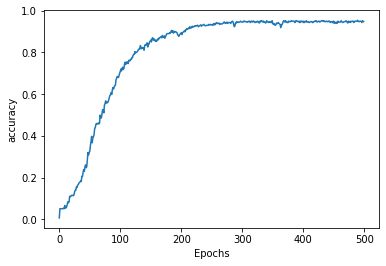

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'accuracy')

In [18]:
seed_text = "Laurence went to dublin"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
    
print(seed_text)

Laurence went to dublin that nice little milliner painted strangled your glisten glisten glisten


## Lesson 2

In [19]:
tokenizer = Tokenizer()

data = open('tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [20]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs = input_sequences[:,:-1]

labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [21]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


With early stopping

In [38]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_6 (Dense)              (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [40]:
from tensorflow.keras.callbacks import EarlyStopping

gc.collect()

early_stop = EarlyStopping(monitor='accuracy', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=2, callbacks=[early_stop])

Train on 12038 samples
Epoch 1/100
12038/12038 - 5s - loss: 4.7748 - accuracy: 0.1769
Epoch 2/100
12038/12038 - 5s - loss: 3.8492 - accuracy: 0.2489
Epoch 3/100
12038/12038 - 5s - loss: 3.0484 - accuracy: 0.3509
Epoch 4/100
12038/12038 - 5s - loss: 2.4312 - accuracy: 0.4530
Epoch 5/100
12038/12038 - 5s - loss: 1.9367 - accuracy: 0.5508
Epoch 6/100
12038/12038 - 5s - loss: 1.6114 - accuracy: 0.6145
Epoch 7/100
12038/12038 - 5s - loss: 1.3896 - accuracy: 0.6644
Epoch 8/100
12038/12038 - 5s - loss: 1.1984 - accuracy: 0.7092
Epoch 9/100
12038/12038 - 5s - loss: 1.0720 - accuracy: 0.7356
Epoch 10/100
12038/12038 - 5s - loss: 1.0198 - accuracy: 0.7517
Epoch 11/100
12038/12038 - 5s - loss: 1.0648 - accuracy: 0.7320
Epoch 12/100
12038/12038 - 5s - loss: 1.1186 - accuracy: 0.7171
Epoch 13/100
12038/12038 - 5s - loss: 1.1720 - accuracy: 0.7013
Epoch 14/100
12038/12038 - 5s - loss: 1.2009 - accuracy: 0.6927
Epoch 15/100
12038/12038 - 5s - loss: 1.2111 - accuracy: 0.6905


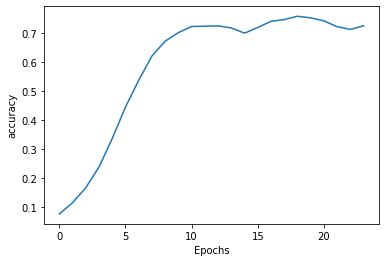

In [29]:
plot_graphs(history, 'accuracy')

In [30]:
seed_text = "I've got a bad feeling about this"
next_words = 10

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this one and ill sing married smile so that we gone


In [37]:
seed_text = "I've got a bad feeling about this"
next_words = 100

word_count = 0
max_line = 7

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

    word_count += 1
    if word_count == max_line:
        word_count = 0
        seed_text += '\n'
    
print(seed_text)

new line
new line
new line
new line
new line
new line
new line
new line
new line
new line
new line
new line
new line
new line
I've got a bad feeling about this one and ill sing married smile so
 that we gone gone gone gone gone
 by your gone gone and gone and
 shes left me ive vanished gone horse
 gone for his brothers that id into
 my bride gone and the gone and
 my poured gone gone gone gone gone
 gone gone away away like why and
 colleen storied drop wore while style twould
 set your heart a bubblin might ten
 gone gone heartfrom gone gone gone gone
 english gone gone gone through my breast
 gone and his love gone alas alas
 his gone on his isle gone gone
 your heart


Without early stopping

In [41]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_7 (Dense)              (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [42]:
gc.collect()

history = model.fit(xs, ys, epochs=100, verbose=2)

Train on 12038 samples
Epoch 1/100
12038/12038 - 9s - loss: 6.6816 - accuracy: 0.0747
Epoch 2/100
12038/12038 - 5s - loss: 5.8222 - accuracy: 0.1090
Epoch 3/100
12038/12038 - 5s - loss: 4.9942 - accuracy: 0.1586
Epoch 4/100
12038/12038 - 5s - loss: 4.8332 - accuracy: 0.1887
Epoch 5/100
12038/12038 - 5s - loss: 3.7911 - accuracy: 0.2673
Epoch 6/100
12038/12038 - 5s - loss: 2.8099 - accuracy: 0.3873
Epoch 7/100
12038/12038 - 5s - loss: 2.2799 - accuracy: 0.4820
Epoch 8/100
12038/12038 - 5s - loss: 1.8981 - accuracy: 0.5502
Epoch 9/100
12038/12038 - 5s - loss: 1.6129 - accuracy: 0.6175
Epoch 10/100
12038/12038 - 5s - loss: 1.3718 - accuracy: 0.6690
Epoch 11/100
12038/12038 - 5s - loss: 1.2401 - accuracy: 0.6952
Epoch 12/100
12038/12038 - 5s - loss: 1.1668 - accuracy: 0.7113
Epoch 13/100
12038/12038 - 5s - loss: 1.1444 - accuracy: 0.7127
Epoch 14/100
12038/12038 - 5s - loss: 1.1002 - accuracy: 0.7196
Epoch 15/100
12038/12038 - 5s - loss: 1.0819 - accuracy: 0.7248
Epoch 16/100
12038/12038 -

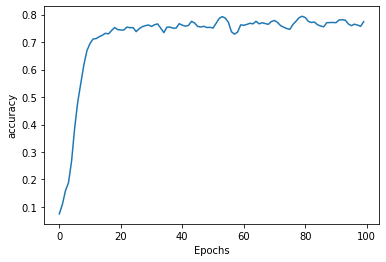

In [43]:
plot_graphs(history, 'accuracy')

In [44]:
seed_text = "I've got a bad feeling about this \n"
next_words = 100

word_count = 0
max_line = 7

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

    word_count += 1
    if word_count == max_line:
        word_count = 0
        seed_text += '\n'
    
print(seed_text)

I've got a bad feeling about this 
 one more still i hear be my
 bride had gone gone free rocky slopes
 round gone down gone down on irish
 love eyes whereon i had gone on
 your hat and throw i bride gone
 gone them down gone by killarneys green
 over where i had it lave love
 i horses nor harp would entwine itself
 done the ground whereon whereon i puff
 my hand on love i gone love
 in ones on me my shoes early
 early before i had gone here workin
 down gone down gone and love i
 my eyes glisten sinking funds had love
 my gone
